### Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [3]:
# tracking all the text files in the reviews folder
path,dirs,files=next(os.walk('txt_reviews'))

In [4]:
# first 5 files in the folder
files[:5]

['review_1.txt',
 'review_10.txt',
 'review_100.txt',
 'review_1000.txt',
 'review_10000.txt']

In [5]:
with open(r'txt_reviews\review_1.txt') as txt_file:
    text_data=txt_file.read().split('\n')

In [6]:
# Loaded text file data
text_data

['ProductId: B001E4KFG0',
 'UserId: A3SGXH7AUHU8GW',
 'ProfileName: delmartian',
 'HelpfulnessNumerator: 1',
 'HelpfulnessDenominator: 1',
 'Score: 5',
 'Time: 1303862400',
 'ReviewSummary: Good Quality Dog Food',
 'ReviewText: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 '']

In [7]:
# sample run to see the extractration of data using regex 
for i in range(len(text_data)-1):
    print(re.search(r'\s[^:\s].*',text_data[i]).group().strip())

B001E4KFG0
A3SGXH7AUHU8GW
delmartian
1
1
5
1303862400
Good Quality Dog Food
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [8]:
with open(r'txt_reviews\review_487679.txt') as txt_file:
    text_data=txt_file.read().split('\n')

In [9]:
print(text_data)

['ProductId: B000GJQ5C2', 'UserId: A1XCP20ZTTOLBX', 'ProfileName: T. Tucker', 'HelpfulnessNumerator: 1', 'HelpfulnessDenominator: 3', 'Score: 3', 'Time: 1242950400', "ReviewSummary: A great product if you don't want to make yourself.", 'ReviewText: I thought it was great. I prefer to make it myself then I can adjust the recipe as I see fit. I guess I expected so much more from reading all the reviews and seeing it on Foodtv and I thought I have got to try it.', '']


In [10]:
# initializing empty lists to store the extracted fields
product_ids = []
user_ids = []
profile_names = []
helpfulness_numerators = []
helpfulness_denominators = []
scores = []
time = []
review_summaries = []
review_texts = []

# looping through all the text files to extract the fields
for i in range(len(files)):
    with open(os.path.join(path,files[i]), encoding='utf-8') as t:
        text=t.read().split('\n')
        temp=[]
        if (len(text)==10):
            for i in range(len(text)-1):
                match_obj=re.search(r'\s[^:\s].*',text[i])
                if (match_obj is not None):
                    temp.append(match_obj.group().strip())
                else:
                    temp.append(np.nan)
        else:
            for i in range(len(text)):
                match_obj=re.search(r'\s[^:\s].*',text[i])
                if (match_obj is not None):
                    temp.append(match_obj.group().strip())
                else:
                    temp.append(np.nan)
                    
# Appending the extracted fields to the lists
        product_ids.append(temp[0])
        user_ids.append(temp[1])
        profile_names.append(temp[2])
        helpfulness_numerators.append(temp[3])
        helpfulness_denominators.append(temp[4])
        scores.append(temp[5])
        time.append(temp[6])
        review_summaries.append(temp[7])
        review_texts.append(temp[8])

In [11]:
len(review_texts)

568454

In [12]:
# creating the data frame with the lists
df = pd.DataFrame({"product_id": product_ids, "user_id": user_ids, "profile_name": profile_names, 
                   "helpfulness_numerator": helpfulness_numerators, "helpfulness_denominator": helpfulness_denominators, 
                   "score": scores, "time": time, "review_summary": review_summaries, "review_text": review_texts })

In [13]:
df

,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,review_summary,review_text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...
568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...
568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   product_id               568454 non-null  object
 1   user_id                  568454 non-null  object
 2   profile_name             568446 non-null  object
 3   helpfulness_numerator    568454 non-null  object
 4   helpfulness_denominator  568454 non-null  object
 5   score                    568454 non-null  object
 6   time                     568454 non-null  object
 7   review_summary           568413 non-null  object
 8   review_text              568454 non-null  object
dtypes: object(9)
memory usage: 39.0+ MB


In [15]:
# removing null values of the column review summary
df[df.review_summary.isnull()]

,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,review_summary,review_text
9969,B005VOOGC8,A1RJDQPF8G9WEP,Neny,1,1,1,1347667200,NaN,I bought this coffee thinking that would taste...
22234,B000CMF18W,A2J8S4YT1C5YKC,Margaret Stark,1,3,5,1237593600,NaN,Very good tea. I received the tea in a recent...
23391,B000ETXO8M,A1WND3H0CERXZG,w33mhz,0,4,1,1318809600,NaN,To sum this product up with one word it would ...
49482,B000NIL5ZS,A3ETD901YLD26M,"Gina ""Gina""",0,0,5,1336780800,NaN,Simply yummy! A fine tea to sit back with and ...
84383,B001D3K2CE,A2WRNV6AW3U4SQ,ashlie,0,0,3,1342742400,NaN,love this gum and it is big enough to put on m...
124197,B000CNB4LE,A2K1EWIW0Q26CT,Nirav Shah,1,1,1,1285891200,NaN,I used to LOVE zico tetra pack. this new stuff...
126449,B0039LVLS2,A2ITY3Z0PRE2JU,kkstlcop,1,1,4,1350432000,NaN,This product has an interesting take on fries ...
152967,B009I31XNI,ABM3Q1FMLVQDX,Amanda,1,1,5,1349136000,NaN,"I absolutely love this bakery, their cookies a..."
167594,B00125W15Y,A35CCD0Z53AFK8,Charlotte T.,2,2,5,1221955200,NaN,I have breakout-prone skin and this oil-free m...
168924,B001BU0JEK,A1SLJ3YGYYOVHV,AD,0,0,5,1325376000,NaN,didn't get what i saw in the picture.....got a...


In [16]:
df.drop(labels=df[df.review_summary.isnull()].index, inplace=True)
# Ignoring the null values in the profile name column due to the fact that, the column is redundant and would be removed later 

In [17]:
# saving the dataframe as CSV file
df.to_csv(r'reviews.csv')

### Loading the Dataset

In [3]:
# loading the dataset and displaying top 5 rows
reviews=pd.read_csv('reviews.csv', usecols=lambda column: column != 'Unnamed: 0')
reviews.head()

,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,review_summary,review_text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [4]:
# Checking if there are any null values in the dataframe other than the profile column
reviews.isnull().sum()

product_id                  0
user_id                     0
profile_name               24
helpfulness_numerator       0
helpfulness_denominator     0
score                       0
time                        0
review_summary             27
review_text                 0
dtype: int64

In [5]:
# Dropping the null values in the dataframe
reviews.drop(labels=reviews[reviews.review_summary.isnull()].index, inplace=True)

In [51]:
# number of unique values in each columns
for i in reviews.columns:
    print(i,':',reviews['{}'.format(i)].nunique())

product_id : 74256
user_id : 256034
profile_name : 218391
helpfulness_numerator : 231
helpfulness_denominator : 234
score : 5
time : 3168
review_summary : 295733
review_text : 393544
helpfulness : 933


In [52]:
# checking if there are any null values
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568386 entries, 0 to 568412
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_id               568386 non-null  object 
 1   user_id                  568386 non-null  object 
 2   profile_name             568362 non-null  object 
 3   helpfulness_numerator    568386 non-null  int64  
 4   helpfulness_denominator  568386 non-null  int64  
 5   score                    568386 non-null  int64  
 6   time                     568386 non-null  int64  
 7   review_summary           568386 non-null  object 
 8   review_text              568386 non-null  object 
 9   helpfulness              568386 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 47.7+ MB


In [7]:
# creating a new column helfulness fraction.
reviews['helpfulness']=[i if i>=0 else 0 for i in round(reviews.helpfulness_numerator/reviews.helpfulness_denominator,4)]

In [8]:
# Ignoring all the redundant columns
data=reviews.iloc[:,5:]
data.drop(columns=['time'],axis=1, inplace=True)

In [9]:
# combining the summary and review text to a single column and putting them in order
data['reviews_comb']=data.review_summary+' '+data.review_text
data=data[['helpfulness','reviews_comb','score']]

In [10]:
# Labelling the score column into binary classification
data.score=[0 if i<3 else 1 for i in data.score]
data.head()

,helpfulness,reviews_comb,score
0,1.0,Good Quality Dog Food I have bought several of...,1
1,0.0,Healthy Dog Food This is a very healthy dog fo...,1
2,0.0,Bad I fed this to my Golden Retriever and he h...,0
3,0.4,"Not hot, not habanero I have to admit, I was a...",0
4,0.0,The best weve tried so far We have a 7 week ol...,1


In [11]:
# Seperating the labels and dataset
X=data.iloc[:,:2]
y=data.score

### Exploratory Data Analysis on the Data

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='count'>

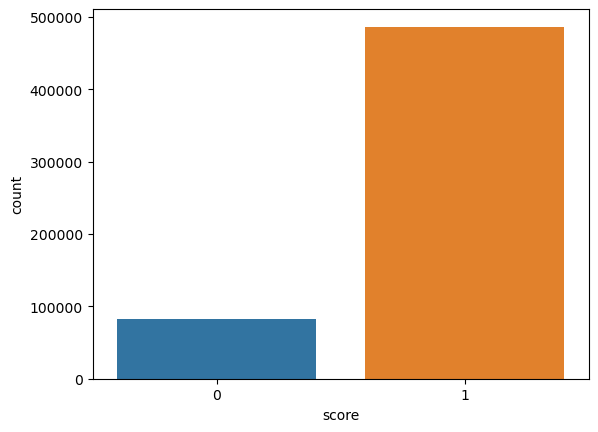

In [58]:
# Count plot to see the distribution of the labels of the data
sns.countplot(data.score)

From the above plot we can infer that the data is imbalanced.

######  Data preparation - Text Preprocessing

In [12]:
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

In [13]:
# splitting the data into train and test data with 75,25 ratio. Stratify is being used as the data is imbalanced and to retain 
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=.25, random_state=9, stratify=y)    # the distibution of label

In [14]:
x_train.head()

,helpfulness,reviews_comb
93026,1.0000,Excellant Marinade This is a excellant marinad...
136543,0.0000,"Decent, but not as good as the liter container..."
182298,0.6667,"Disappointed the oil didn't come in a ""jar"" en..."
253245,1.0000,"Crunchy, Tasty, Light I love this granola! I p..."
387125,0.0000,My dogs love em.... but what's with the white ...


In [17]:
# shape of train and test data
print('x_train shape : ',x_train.shape,5*' ', 'y train shape : ',y_train.shape, 
      '\nx_test shape  : ',x_test.shape, 5*' ', 'y test shape  : ',y_test.shape )

x_train shape :  (426289, 2)       y train shape :  (426289,) 
x_test shape  :  (142097, 2)       y test shape  :  (142097,)


In [18]:
# importing stopwords
stp=stopwords.words('english')

In [19]:
# Inititalizing Porter Stemmer
porter=PorterStemmer()
# Inititalizing Lemmatizer
lemmatizer=WordNetLemmatizer()
# Inititalizing Lancaster Stemmer
lancaster=LancasterStemmer()

In [20]:
# Creating a function to preprocess the data
def preprocess(text, tag='porter'):
    # tokenizing and removing the stopwords by converting the words to lowercase
    cleaned_text=[i for i in re.sub('[^A-Za-z ]','',text.lower()).split() if i not in stp if len(i)>2 ]
    # stemming and lemmatization
    if(tag=='porter'):
        cleaned_tokens=[porter.stem(i) for i in cleaned_text]
    elif(tag=='lancaster'):
        cleaned_tokens=[lancaster.stem(i) for i in cleaned_text]
    else:
        cleaned_tokens=[lemmatizer.lemmatize(i) for i in cleaned_text]
    return pd.Series([" ".join(cleaned_tokens), len(cleaned_tokens)])

In [21]:
# Storing the preprocessed combined reviews of Porter Stemmer in a dataframe
temp=x_train.reviews_comb.apply(lambda x: preprocess(x))

In [22]:
# Assigning column names to the dataframe
temp.columns = ['text_porter', 'text_length_porter']
temp.head()

,text_porter,text_length_porter
93026,excel marinad excel marinad meat husband use m...,18
136543,decent good liter contain purchas buy liter co...,45
182298,disappoint oil didnt come jar end plastic bott...,29
253245,crunchi tasti light love granola pick whim mar...,52
387125,dog love what white spot would give star deduc...,43


In [23]:
# Concatinating the coulumns to the X_train
x_train=pd.concat([x_train,temp],axis=1)
x_train.head()

,helpfulness,reviews_comb,text_porter,text_length_porter
93026,1.0000,Excellant Marinade This is a excellant marinad...,excel marinad excel marinad meat husband use m...,18
136543,0.0000,"Decent, but not as good as the liter container...",decent good liter contain purchas buy liter co...,45
182298,0.6667,"Disappointed the oil didn't come in a ""jar"" en...",disappoint oil didnt come jar end plastic bott...,29
253245,1.0000,"Crunchy, Tasty, Light I love this granola! I p...",crunchi tasti light love granola pick whim mar...,52
387125,0.0000,My dogs love em.... but what's with the white ...,dog love what white spot would give star deduc...,43


In [24]:
# Applying Lancaster stemmer on the combined reviews column and concatinating the resultant columns to the X-train Dataframe
temp=x_train.reviews_comb.apply(lambda x: preprocess(x,tag='lancaster'))
temp.columns = ['text_lancaster', 'text_length_lancaster']
temp.head()
x_train=pd.concat([x_train,temp],axis=1)
x_train.head()

,helpfulness,reviews_comb,text_porter,text_length_porter,text_lancaster,text_length_lancaster
93026,1.0000,Excellant Marinade This is a excellant marinad...,excel marinad excel marinad meat husband use m...,18,excel marinad excel marinad meat husband us ma...,18
136543,0.0000,"Decent, but not as good as the liter container...",decent good liter contain purchas buy liter co...,45,dec good lit contain purchas buy lit coconut w...,45
182298,0.6667,"Disappointed the oil didn't come in a ""jar"" en...",disappoint oil didnt come jar end plastic bott...,29,disappoint oil didnt com jar end plast bottl e...,29
253245,1.0000,"Crunchy, Tasty, Light I love this granola! I p...",crunchi tasti light love granola pick whim mar...,52,crunchy tasty light lov granol pick whim marsh...,52
387125,0.0000,My dogs love em.... but what's with the white ...,dog love what white spot would give star deduc...,43,dog lov what whit spot would giv star deduc st...,43


In [25]:
# Applying Lemmatizer on the combined reviews column and concatinating the resultant columns to the X-train Dataframe
temp=x_train.reviews_comb.apply(lambda x: preprocess(x,tag='lemmatizer'))
temp.columns = ['text_lemmatizer', 'text_length_lemmatizer']
temp.head()
x_train=pd.concat([x_train,temp],axis=1)
x_train.head()

,helpfulness,reviews_comb,text_porter,text_length_porter,text_lancaster,text_length_lancaster,text_lemmatizer,text_length_lemmatizer
93026,1.0000,Excellant Marinade This is a excellant marinad...,excel marinad excel marinad meat husband use m...,18,excel marinad excel marinad meat husband us ma...,18,excellant marinade excellant marinade meat hus...,18
136543,0.0000,"Decent, but not as good as the liter container...",decent good liter contain purchas buy liter co...,45,dec good lit contain purchas buy lit coconut w...,45,decent good liter container purchased buy lite...,45
182298,0.6667,"Disappointed the oil didn't come in a ""jar"" en...",disappoint oil didnt come jar end plastic bott...,29,disappoint oil didnt com jar end plast bottl e...,29,disappointed oil didnt come jar ended plastic ...,29
253245,1.0000,"Crunchy, Tasty, Light I love this granola! I p...",crunchi tasti light love granola pick whim mar...,52,crunchy tasty light lov granol pick whim marsh...,52,crunchy tasty light love granola picked whim m...,52
387125,0.0000,My dogs love em.... but what's with the white ...,dog love what white spot would give star deduc...,43,dog lov what whit spot would giv star deduc st...,43,dog love whats white spot would give star dedu...,43


In [74]:
# Saving the dataframe as CSV for future reference
temp.to_csv('sentiment_analysis.csv')

## Creating Word Cloud

In [26]:
# Importing the required libraries for creating the word cloud.
from wordcloud import WordCloud

In [27]:
#creating a dataframe woth negative reviews
negative_df=x_train.loc[y_train==0,:]
# creating a dataframe with positive reviews
positive_df=x_train.loc[y_train==1,:]

In [28]:
# joining all the negative words of the lemmatizer column to a single 
neg_words=' '.join(negative_df.text_lemmatizer)
post_words=' '.join(positive_df.text_lemmatizer)

In [29]:
neg_wordcloud = WordCloud(stopwords=stopwords.words("english"),width=1600,height=800).generate(neg_words)
post_wordcloud = WordCloud(stopwords=stopwords.words("english"),width=1600,height=800).generate(post_words)

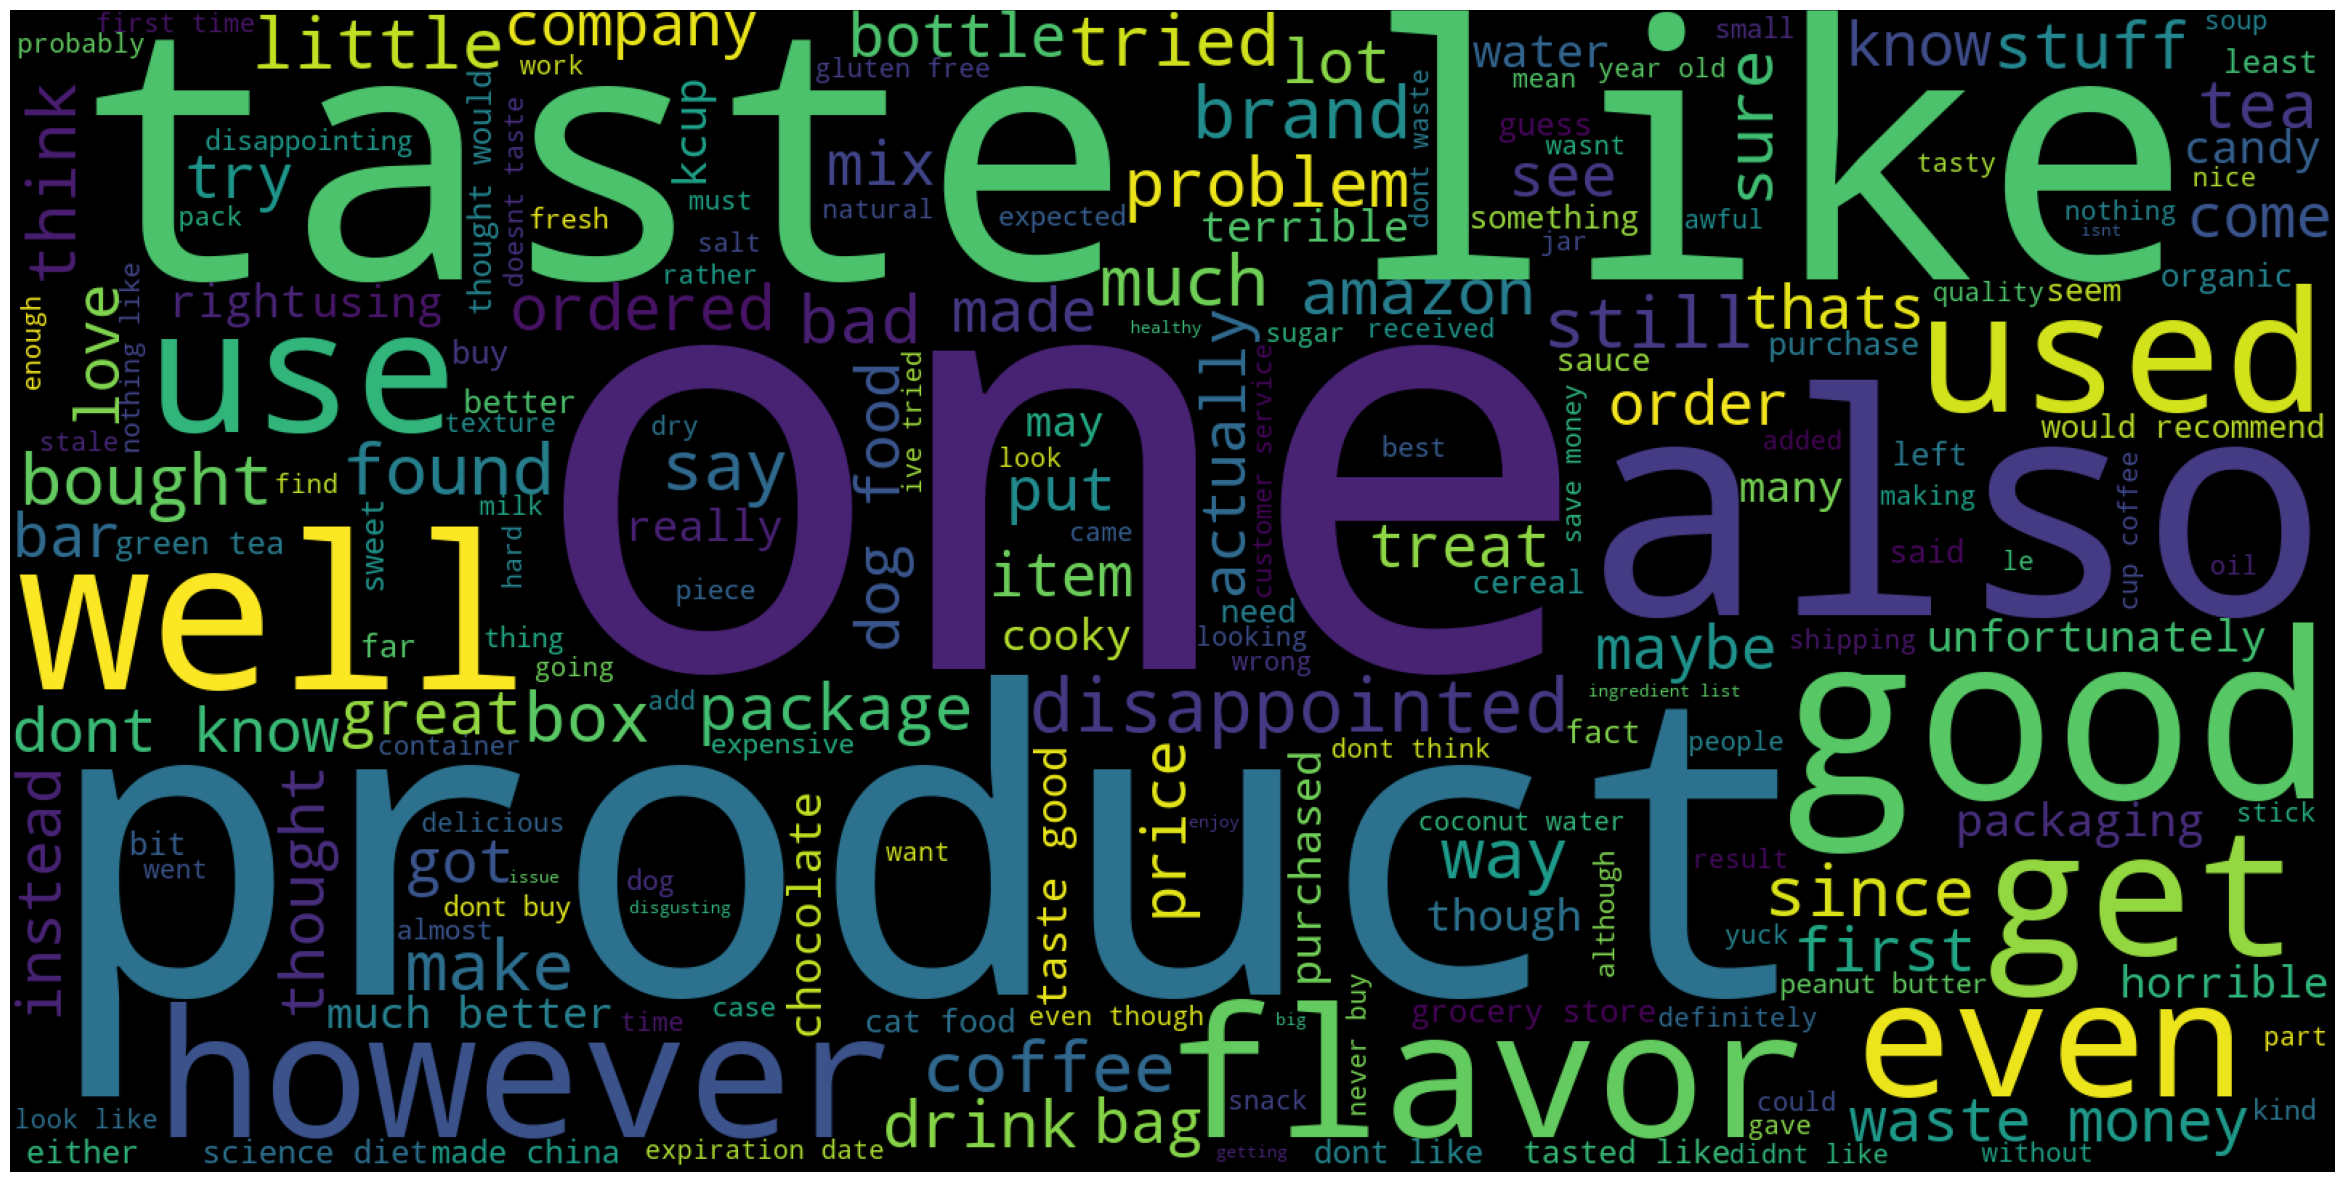

In [89]:
plt.figure(figsize=(30,20))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show()

#####  The above plot is of the negative reviews and the size of the word corresponds to the frequency of the words. Similar color indicates the similar frequency

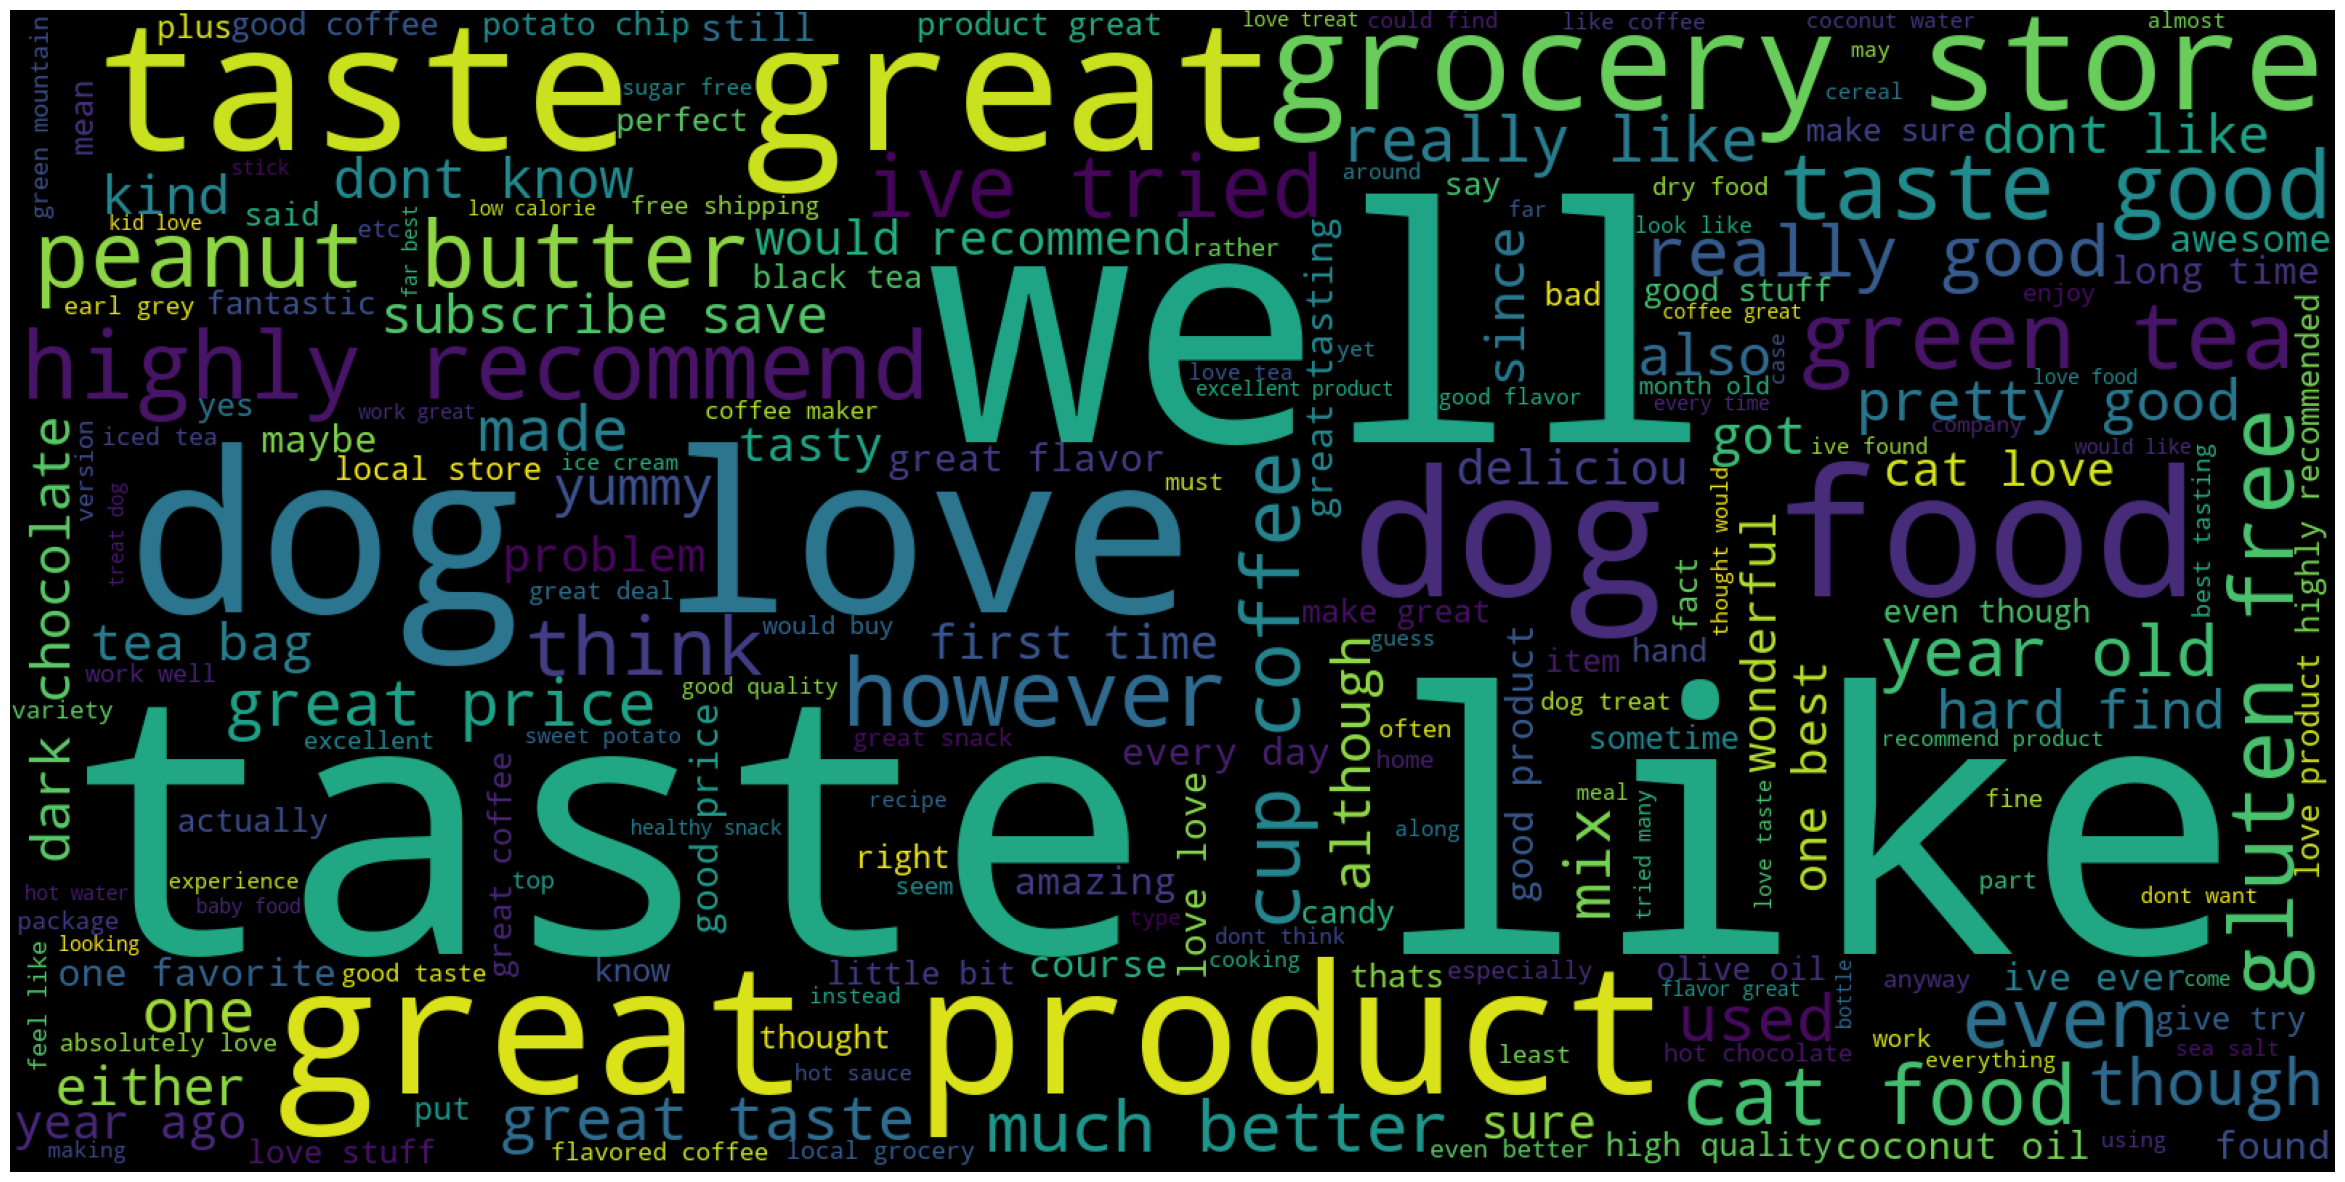

In [90]:
plt.figure(figsize=(30,20))
plt.imshow(post_wordcloud)
plt.axis('off')
plt.show()

#####  The above plot is of the positive reviews and the size of the word corresponds to the frequency of the words. Similar color indicates the similar frequency

### Converting Words to Numerical Vectors - using BoW and TF-IDF

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## `BoW Representation`

In [31]:
# Initializing the Count Vectorizer (Bag of Words representation)
vocab=CountVectorizer()
# Transforming and Training the Words of Porter Stemmer
x_train_port_bow=vocab.fit_transform(x_train.text_porter)
# Transforming and Training the Words of Lancaster Stemmer
x_train_lanc_bow=vocab.fit_transform(x_train.text_lancaster)
# Transforming and Training the Words of Lemmatizer
x_train_lemma_bow=vocab.fit_transform(x_train.text_lemmatizer)

In [32]:
# Sparse matrix of the Lemmatizer with Bag of Words representation
x_train_lemma_bow

<426289x192011 sparse matrix of type '<class 'numpy.int64'>'
	with 14808845 stored elements in Compressed Sparse Row format>

In [33]:
# Sparse matrix of the Lancaster Stemmer with Bag of Words representation
x_train_lanc_bow

<426289x151040 sparse matrix of type '<class 'numpy.int64'>'
	with 14446960 stored elements in Compressed Sparse Row format>

In [34]:
# Sparse matrix of the Porter Stemmer with Bag of Words representation
x_train_port_bow

<426289x167538 sparse matrix of type '<class 'numpy.int64'>'
	with 14536062 stored elements in Compressed Sparse Row format>

In [35]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(x_train_port_bow))

Total unique words: 192011
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>


### Preprocess Test Data

In [36]:
x_test.head()

,helpfulness,reviews_comb
14432,0.7857,Gourmet powerful Salt & Vinegar chips! Kettle ...
151650,1.0000,BEST Decaf Coffee--Ever!!! I fell in love with...
487183,1.0000,Great Taste - but has soy sauce These are very...
43666,0.0000,Dry hot wings I find that the buffalo chicken ...
429934,0.0000,Great Stuff! Want popcorn just like the movies...


In [37]:
# Preprocessing the test data by applying Stemming and lemmatizer techniques on the combined reviews column and creating a 
temp=x_test.reviews_comb.apply(lambda x: preprocess(x))                                                           # dataframe

temp.columns = ['text_porter', 'text_length_porter']

x_test=pd.concat([x_test,temp],axis=1)

temp=x_test.reviews_comb.apply(lambda x: preprocess(x,tag='lancaster'))
temp.columns = ['text_lancaster', 'text_length_lancaster']
x_test=pd.concat([x_test,temp],axis=1)

temp=x_test.reviews_comb.apply(lambda x: preprocess(x,tag='lemmatizer'))
temp.columns = ['text_lemmatizer', 'text_length_lemmatizer']
x_test=pd.concat([x_test,temp],axis=1)
x_test.head()

,helpfulness,reviews_comb,text_porter,text_length_porter,text_lancaster,text_length_lancaster,text_lemmatizer,text_length_lemmatizer
14432,0.7857,Gourmet powerful Salt & Vinegar chips! Kettle ...,gourmet power salt vinegar chip kettl brand ch...,90,gourmet pow salt vineg chip kettl brand chip c...,90,gourmet powerful salt vinegar chip kettle bran...,90
151650,1.0000,BEST Decaf Coffee--Ever!!! I fell in love with...,best decaf coffeeev fell love coffe fine resta...,39,best decaf coffeeev fel lov coff fin resta fel...,39,best decaf coffeeever fell love coffee fine re...,39
487183,1.0000,Great Taste - but has soy sauce These are very...,great tast soy sauc tender tasti perhap sweet ...,19,gre tast soy sauc tend tasty perhap sweet wish...,19,great taste soy sauce tender tasty perhaps swe...,19
43666,0.0000,Dry hot wings I find that the buffalo chicken ...,dri hot wing find buffalo chicken jerki great ...,24,dry hot wing find buffalo chick jerky gre crav...,24,dry hot wing find buffalo chicken jerky great ...,24
429934,0.0000,Great Stuff! Want popcorn just like the movies...,great stuff want popcorn like movi stuff great...,41,gre stuff want popcorn lik movy stuff gre prod...,41,great stuff want popcorn like movie stuff grea...,41


In [38]:
# Transforming the test data to bag of words representation
x_test_port_bow=vocab.transform(x_test.text_porter)
x_test_lanc_bow=vocab.transform(x_test.text_lancaster)
x_test_lemma_bow=vocab.transform(x_test.text_lemmatizer)

## `TF-IDF`
##### Transforming train data

In [39]:
# Initializing the Term Frequency and Inverse Document Frequency object
tfidf_vectorizer = TfidfVectorizer()
# Transforming and Training the Words of Porter Stemmer
x_train_port_tfidf=tfidf_vectorizer.fit_transform(x_train.text_porter)
# Transforming and Training the Words of Lancaster Stemmer
x_train_lanc_tfidf=tfidf_vectorizer.fit_transform(x_train.text_lancaster)
# Transforming and Training the Words of Lemmatizer
x_train_lemma_tfidf=tfidf_vectorizer.fit_transform(x_train.text_lemmatizer)

In [40]:
# Sparse matrix of the Porter Stemmer with TF - IDF representation
x_train_port_tfidf

<426289x167538 sparse matrix of type '<class 'numpy.float64'>'
	with 14536062 stored elements in Compressed Sparse Row format>

In [41]:
# Sparse matrix of the Lancaster Stemmer with TF - IDF representation
x_train_lanc_tfidf

<426289x151040 sparse matrix of type '<class 'numpy.float64'>'
	with 14446960 stored elements in Compressed Sparse Row format>

In [42]:
# Sparse matrix of the Lemmatizer with TF - IDF representation
x_train_lemma_tfidf

<426289x192011 sparse matrix of type '<class 'numpy.float64'>'
	with 14808845 stored elements in Compressed Sparse Row format>

In [43]:
print("Total unique words:", len(tfidf_vectorizer.vocabulary_))

print("Type of train features:", type(x_train_port_tfidf))

Total unique words: 192011
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>


#####  Transforming Test data

In [44]:
# Transforming the test data to bag of words representation
x_test_port_tfidf=tfidf_vectorizer.transform(x_test.text_porter)
x_test_lanc_tfidf=tfidf_vectorizer.transform(x_test.text_lancaster)
x_test_lemma_tfidf=tfidf_vectorizer.transform(x_test.text_lemmatizer)

## Training and Testing

In [45]:
# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Training and Testing for BoW Representation
### Logistic Regression

In [46]:
# Initializing the Logistic Regression Object
classifier = LogisticRegression()
# Training on the Porter Stemmer Data
classifier.fit(x_train_port_bow, y_train)
# Training on the Lancaster Stemmer Data
classifier.fit(x_train_lanc_bow, y_train)
# Training on the Lemmatizer Data
classifier.fit(x_train_lemma_bow, y_train)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()

In [47]:
# Predicting the values based on the Training Data.
y_test_pred_port = classifier.predict(x_test_port_bow)
y_test_pred_lanc = classifier.predict(x_test_lanc_bow)
y_test_pred_lemma = classifier.predict(x_test_lemma_bow)

In [48]:
# Accuracy Score and Classification Report of Porter Stemmer
print(metrics.accuracy_score(y_test, y_test_pred_port))

print(metrics.classification_report(y_test, y_test_pred_port))

0.8958106082464795
              precision    recall  f1-score   support

           0       0.77      0.40      0.53     20500
           1       0.91      0.98      0.94    121597

    accuracy                           0.90    142097
   macro avg       0.84      0.69      0.73    142097
weighted avg       0.89      0.90      0.88    142097



In [49]:
# Accuracy Score and Classification Report of Lancaster Stemmer
print(metrics.accuracy_score(y_test, y_test_pred_lanc))

print(metrics.classification_report(y_test, y_test_pred_lanc))

0.8807645481607634
              precision    recall  f1-score   support

           0       0.64      0.40      0.49     20500
           1       0.90      0.96      0.93    121597

    accuracy                           0.88    142097
   macro avg       0.77      0.68      0.71    142097
weighted avg       0.87      0.88      0.87    142097



In [50]:
# Accuracy Score and Classification Report of Lemmatizer
print(metrics.accuracy_score(y_test, y_test_pred_lemma))

print(metrics.classification_report(y_test, y_test_pred_lemma))

0.9366770586289648
              precision    recall  f1-score   support

           0       0.83      0.71      0.76     20500
           1       0.95      0.98      0.96    121597

    accuracy                           0.94    142097
   macro avg       0.89      0.84      0.86    142097
weighted avg       0.93      0.94      0.93    142097



### From the above report, we can deduce that Lemmatizer has higher accuracy score compared to the BoW representation techniques

In [51]:
# appending the score of each technique to a list for future reference
port,lanc,lemma,index=[],[],[],['logistic_regression']
port.append(metrics.accuracy_score(y_test, y_test_pred_port))
lanc.append(metrics.accuracy_score(y_test, y_test_pred_lanc))
lemma.append(metrics.accuracy_score(y_test, y_test_pred_lemma))

### KNN Classifier

In [52]:
# Initializing the KNN Clasifier Object
classifier=KNeighborsClassifier()
# Training on the Porter Stemmer Data
classifier.fit(x_train_port_bow, y_train)
# Training on the Lancaster Stemmer Data
classifier.fit(x_train_lanc_bow, y_train)
# Training on the Lemmatizer Data
classifier.fit(x_train_lemma_bow, y_train)

KNeighborsClassifier()

In [53]:
# Predicting the values based on the training data
y_test_pred_port = classifier.predict(x_test_port_bow)
y_test_pred_lanc = classifier.predict(x_test_lanc_bow)
y_test_pred_lemma = classifier.predict(x_test_lemma_bow)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
# Accuracy Score and Classification Report of Porter Stemmer
print(metrics.accuracy_score(y_test, y_test_pred_port))

print(metrics.classification_report(y_test, y_test_pred_port))

0.8812008698283567
              precision    recall  f1-score   support

           0       0.70      0.31      0.43     20500
           1       0.89      0.98      0.93    121597

    accuracy                           0.88    142097
   macro avg       0.80      0.64      0.68    142097
weighted avg       0.87      0.88      0.86    142097



In [55]:
# Accuracy Score and Classification Report of Lancaster Stemmer
print(metrics.accuracy_score(y_test, y_test_pred_lanc))

print(metrics.classification_report(y_test, y_test_pred_lanc))

0.8532270209786272
              precision    recall  f1-score   support

           0       0.48      0.18      0.26     20500
           1       0.87      0.97      0.92    121597

    accuracy                           0.85    142097
   macro avg       0.68      0.57      0.59    142097
weighted avg       0.82      0.85      0.82    142097



In [56]:
# Accuracy Score and Classification Report of Lemmatizer
print(metrics.accuracy_score(y_test, y_test_pred_lemma))

print(metrics.classification_report(y_test, y_test_pred_lemma))

0.8925874578632905
              precision    recall  f1-score   support

           0       0.75      0.38      0.51     20500
           1       0.90      0.98      0.94    121597

    accuracy                           0.89    142097
   macro avg       0.83      0.68      0.72    142097
weighted avg       0.88      0.89      0.88    142097



### For KNN Classifier of BoW representation, at default value of K=5, it is observed that it is not so efficient. The highest accuracy score is .89, which can be tuned by finding the best K-value

In [57]:
# appending the score of each technique to a list for future reference
port.append(metrics.accuracy_score(y_test, y_test_pred_port))
lanc.append(metrics.accuracy_score(y_test, y_test_pred_lanc))
lemma.append(metrics.accuracy_score(y_test, y_test_pred_lemma))

In [58]:
index.append('knn_classifier')

### Decision Tree

In [59]:
# Initializing the Decision Tree object
classifier = DecisionTreeClassifier()
# Training on the Porter Stemmer Data
classifier.fit(x_train_port_bow, y_train)
# Training on the Lancaster Stemmer Data
classifier.fit(x_train_lanc_bow, y_train)
# Training on the Lemmatizer Data
classifier.fit(x_train_lemma_bow, y_train)

DecisionTreeClassifier()

In [60]:
# Predicting the values based on the training data.
y_test_pred_port = classifier.predict(x_test_port_bow)
y_test_pred_lanc = classifier.predict(x_test_lanc_bow)
y_test_pred_lemma = classifier.predict(x_test_lemma_bow)

In [61]:
# Accuracy Score and Classification Report of Porter Stemmer
print(metrics.accuracy_score(y_test, y_test_pred_port))

print(metrics.classification_report(y_test, y_test_pred_port))

0.8652962412999571
              precision    recall  f1-score   support

           0       0.54      0.43      0.48     20500
           1       0.91      0.94      0.92    121597

    accuracy                           0.87    142097
   macro avg       0.72      0.68      0.70    142097
weighted avg       0.85      0.87      0.86    142097



In [62]:
# Accuracy Score and Classification Report of Lancaster Stemmer
print(metrics.accuracy_score(y_test, y_test_pred_lanc))

print(metrics.classification_report(y_test, y_test_pred_lanc))

0.8327550898330014
              precision    recall  f1-score   support

           0       0.42      0.45      0.44     20500
           1       0.91      0.90      0.90    121597

    accuracy                           0.83    142097
   macro avg       0.67      0.67      0.67    142097
weighted avg       0.84      0.83      0.83    142097



In [63]:
# Accuracy Score and Classification Report of Lemmatizer
print(metrics.accuracy_score(y_test, y_test_pred_lemma))

print(metrics.classification_report(y_test, y_test_pred_lemma))

0.9178448524599393
              precision    recall  f1-score   support

           0       0.73      0.68      0.71     20500
           1       0.95      0.96      0.95    121597

    accuracy                           0.92    142097
   macro avg       0.84      0.82      0.83    142097
weighted avg       0.92      0.92      0.92    142097



### For Decision Tree of BoW representation, the highest accuracy score is .91 which is still less compared to logistic regression. It can be fine tuned using hyper parameters.

In [64]:
port.append(metrics.accuracy_score(y_test, y_test_pred_port))
lanc.append(metrics.accuracy_score(y_test, y_test_pred_lanc))
lemma.append(metrics.accuracy_score(y_test, y_test_pred_lemma))
index.append('decision_tree')

# Training and Testing for TF - IDF
### Logistic Regression

In [65]:
classifier = LogisticRegression()
classifier.fit(x_train_port_tfidf, y_train)
classifier.fit(x_train_lanc_tfidf, y_train)
classifier.fit(x_train_lemma_tfidf, y_train)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()

In [66]:
y_test_pred_port_tfidf = classifier.predict(x_test_port_tfidf)
y_test_pred_lanc_tfidf = classifier.predict(x_test_lanc_tfidf)
y_test_pred_lemma_tfidf = classifier.predict(x_test_lemma_tfidf)

In [67]:
print(metrics.accuracy_score(y_test, y_test_pred_port_tfidf))

print(metrics.classification_report(y_test, y_test_pred_port_tfidf))

0.8973025468517984
              precision    recall  f1-score   support

           0       0.83      0.36      0.51     20500
           1       0.90      0.99      0.94    121597

    accuracy                           0.90    142097
   macro avg       0.86      0.68      0.72    142097
weighted avg       0.89      0.90      0.88    142097



In [68]:
print(metrics.accuracy_score(y_test, y_test_pred_lanc_tfidf))

print(metrics.classification_report(y_test, y_test_pred_lanc_tfidf))

0.8880694173698248
              precision    recall  f1-score   support

           0       0.81      0.29      0.43     20500
           1       0.89      0.99      0.94    121597

    accuracy                           0.89    142097
   macro avg       0.85      0.64      0.68    142097
weighted avg       0.88      0.89      0.86    142097



In [69]:
print(metrics.accuracy_score(y_test, y_test_pred_lemma_tfidf))

print(metrics.classification_report(y_test, y_test_pred_lemma_tfidf))

0.9335876197245544
              precision    recall  f1-score   support

           0       0.84      0.67      0.74     20500
           1       0.95      0.98      0.96    121597

    accuracy                           0.93    142097
   macro avg       0.89      0.82      0.85    142097
weighted avg       0.93      0.93      0.93    142097



In [70]:
port_tf,lanc_tf,lemma_tf,index_tf=[],[],[],['logistic_regression']
port_tf.append(metrics.accuracy_score(y_test, y_test_pred_port_tfidf))
lanc_tf.append(metrics.accuracy_score(y_test, y_test_pred_lanc_tfidf))
lemma_tf.append(metrics.accuracy_score(y_test, y_test_pred_lemma_tfidf))

### KNN Classifier

In [71]:
classifier=KNeighborsClassifier()
classifier.fit(x_train_port_tfidf, y_train)
classifier.fit(x_train_lanc_tfidf, y_train)
classifier.fit(x_train_lemma_tfidf, y_train)

KNeighborsClassifier()

In [72]:
y_test_pred_port_tfidf = classifier.predict(x_test_port_tfidf)
y_test_pred_lanc_tfidf = classifier.predict(x_test_lanc_tfidf)
y_test_pred_lemma_tfidf = classifier.predict(x_test_lemma_tfidf)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [73]:
print(metrics.accuracy_score(y_test, y_test_pred_port_tfidf))

print(metrics.classification_report(y_test, y_test_pred_port_tfidf))

0.8862959809144457
              precision    recall  f1-score   support

           0       0.83      0.27      0.40     20500
           1       0.89      0.99      0.94    121597

    accuracy                           0.89    142097
   macro avg       0.86      0.63      0.67    142097
weighted avg       0.88      0.89      0.86    142097



In [74]:
print(metrics.accuracy_score(y_test, y_test_pred_lanc_tfidf))

print(metrics.classification_report(y_test, y_test_pred_lanc_tfidf))

0.8748742056482544
              precision    recall  f1-score   support

           0       0.77      0.19      0.31     20500
           1       0.88      0.99      0.93    121597

    accuracy                           0.87    142097
   macro avg       0.82      0.59      0.62    142097
weighted avg       0.86      0.87      0.84    142097



In [75]:
print(metrics.accuracy_score(y_test, y_test_pred_lemma_tfidf))

print(metrics.classification_report(y_test, y_test_pred_lemma_tfidf))

0.8993645186034892
              precision    recall  f1-score   support

           0       0.86      0.36      0.51     20500
           1       0.90      0.99      0.94    121597

    accuracy                           0.90    142097
   macro avg       0.88      0.68      0.73    142097
weighted avg       0.90      0.90      0.88    142097



In [76]:
port_tf.append(metrics.accuracy_score(y_test, y_test_pred_port_tfidf))
lanc_tf.append(metrics.accuracy_score(y_test, y_test_pred_lanc_tfidf))
lemma_tf.append(metrics.accuracy_score(y_test, y_test_pred_lemma_tfidf))
index_tf.append('knn_classifier')

### Decision Tree Classifier

In [77]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train_port_tfidf, y_train)
classifier.fit(x_train_lanc_tfidf, y_train)
classifier.fit(x_train_lemma_tfidf, y_train)

DecisionTreeClassifier()

In [78]:
y_test_pred_port_tfidf = classifier.predict(x_test_port_tfidf)
y_test_pred_lanc_tfidf = classifier.predict(x_test_lanc_tfidf)
y_test_pred_lemma_tfidf = classifier.predict(x_test_lemma_tfidf)

In [79]:
print(metrics.accuracy_score(y_test, y_test_pred_port_tfidf))

print(metrics.classification_report(y_test, y_test_pred_port_tfidf))

0.8620238287930075
              precision    recall  f1-score   support

           0       0.53      0.40      0.45     20500
           1       0.90      0.94      0.92    121597

    accuracy                           0.86    142097
   macro avg       0.72      0.67      0.69    142097
weighted avg       0.85      0.86      0.85    142097



In [80]:
print(metrics.accuracy_score(y_test, y_test_pred_lanc_tfidf))

print(metrics.classification_report(y_test, y_test_pred_lanc_tfidf))

0.8448524599393372
              precision    recall  f1-score   support

           0       0.45      0.35      0.40     20500
           1       0.89      0.93      0.91    121597

    accuracy                           0.84    142097
   macro avg       0.67      0.64      0.65    142097
weighted avg       0.83      0.84      0.84    142097



In [81]:
print(metrics.accuracy_score(y_test, y_test_pred_lemma_tfidf))

print(metrics.classification_report(y_test, y_test_pred_lemma_tfidf))

0.9146780016467624
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     20500
           1       0.95      0.95      0.95    121597

    accuracy                           0.91    142097
   macro avg       0.83      0.82      0.83    142097
weighted avg       0.91      0.91      0.91    142097



In [82]:
port_tf.append(metrics.accuracy_score(y_test, y_test_pred_port_tfidf))
lanc_tf.append(metrics.accuracy_score(y_test, y_test_pred_lanc_tfidf))
lemma_tf.append(metrics.accuracy_score(y_test, y_test_pred_lemma_tfidf))
index_tf.append('decision_tree')

###  Combined accuracy scores of Stemming and Lemmatization techniques for Bag of Words representation

In [94]:
accuracy_bow=pd.DataFrame({'Model':index,'Porter_Stemmer':port,'Lancaster_Stemmer':lanc,'Lemmatizer':lemma})
accuracy_bow

,Model,Porter_Stemmer,Lancaster_Stemmer,Lemmatizer
0,logistic_regression,0.895811,0.880765,0.936677
1,knn_classifier,0.881201,0.853227,0.892587
2,decision_tree,0.865296,0.832755,0.917845


###  Combined accuracy scores of Stemming and Lemmatization techniques for Term Frequency & Inverse Document Freuency technique

In [101]:
accuracy_tfidf=pd.DataFrame({'Model':index_tf,'Porter_Stemmer':port_tf,'Lancaster_Stemmer':lanc_tf,'Lemmatizer':lemma_tf})
accuracy_tfidf

,Model,Porter_Stemmer,Lancaster_Stemmer,Lemmatizer
0,logistic_regression,0.897303,0.888069,0.933588
1,knn_classifier,0.886296,0.874874,0.899365
2,decision_tree,0.862024,0.844852,0.914678


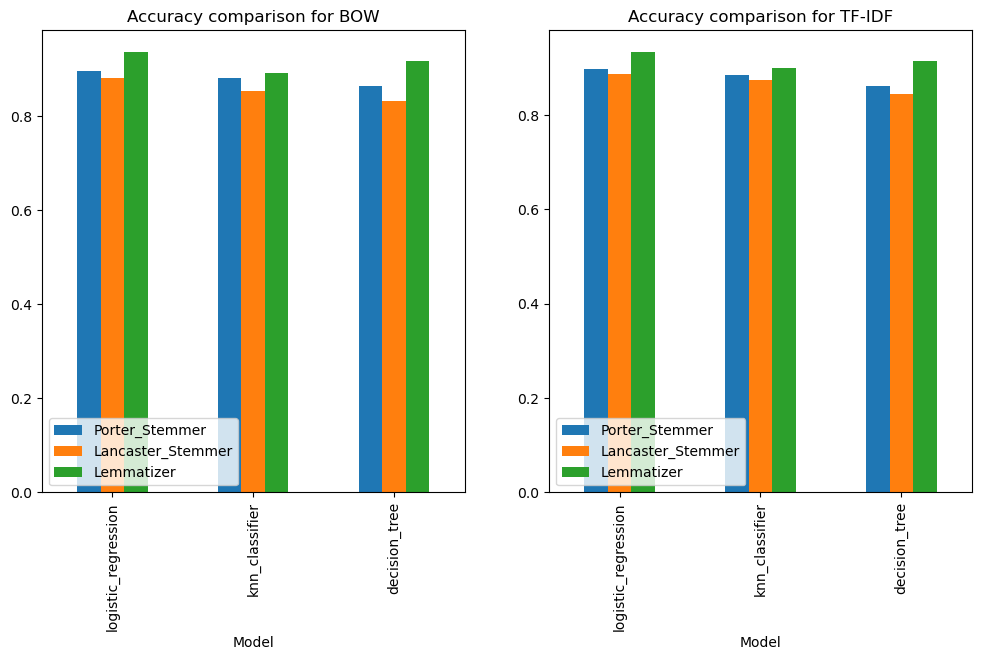

In [111]:
# Plotting the accuracies of the Stemming and Lemmatization techniques
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Creating the first subplot
accuracy_bow.plot(x='Model', y=['Porter_Stemmer', 'Lancaster_Stemmer', 'Lemmatizer'], kind='bar', ax=axs[0])
axs[0].legend(loc='lower left')
axs[0].set_title('Accuracy comparison for BOW')

# Creating the second subplot
accuracy_tfidf.plot(x='Model', y=['Porter_Stemmer', 'Lancaster_Stemmer', 'Lemmatizer'], kind='bar', ax=axs[1])
axs[1].legend(loc='lower left')
axs[1].set_title('Accuracy comparison for TF-IDF')

# Displaying the plot
plt.show()

### From the above plot, it can be inferred that Lemmatizing technique is more efficient as it has the highest accuracy score for all the three algorithms across two Models. Porter Stemmer is better efficient after Lemmatizer.

In [1]:
# # initializing empty lists to store the extracted fields
# product_ids = []
# user_ids = []
# profile_names = []
# helpfulness_numerators = []
# helpfulness_denominators = []
# scores = []
# time = []
# review_summaries = []
# review_texts = []

# # looping through all the text files to extract the fields
# for i in range(len(files)):
#     with open(os.path.join(path,files[i])) as t:
#         text=t.read().split('\n')
#         product_obj=re.search(r'\s[^:\s].*',text[0])
#         if (match_obj is not None):
#             product_ids.timeappend(product_obj.group().strip())
#         else:
#             product_ids.append(np.Nan)
#         user_obj=re.search(r'\s[^:\s].*',text[1])
#         if (user_obj is not None):
#             user_ids.append(user_obj.group().strip())
#         else:
#             user_ids.append(np.Nan)
#         profile_obj=re.search(r'\s[^:\s].*',text[2])
#         if (profile_obj is not None):
#             profile_names.append(profile_obj.group().strip())
#         else:
#             profile_names.append(np.Nan)
#         help_obj=re.search(r'\s[^:\s].*',text[3])
#         if (help_obj is not None):
#             helpfulness_numerators.append(help_obj.group().strip())
#         else:
#             helpfulness_numerators.append(np.Nan)
#         denom_obj=re.search(r'\s[^:\s].*',text[4])
#         if (denom_obj is not None):
#             helpfulness_denominators.append(denom_obj.group().strip())
#         else:
#             helpfulness_denominators.append(np.Nan)
#         scores_obj=re.search(r'\s[^:\s].*',text[5])
#         if (scores_obj is not None):
#             scores_ids.append(scores_obj.group().strip())
#         else:
#             scores_ids.append(np.Nan)
#         time_obj=re.search(r'\s[^:\s].*',text[6])
#         if (time_obj is not None):
#             time_ids.append(time_obj.group().strip())
#         else:
#             time_ids.append(np.Nan)
#         summary_obj=re.search(r'\s[^:\s].*',text[7])
#         if (summary_obj is not None):
#             review_summaries.append(summary_obj.group().strip())
#         else:
#             review_summaries.append(np.Nan)
#         review_obj=re.search(r'\s[^:\s].*',text[8])
#         if (review_obj is not None):
#             review_texts.append(review_obj.group().strip())
#         else:
#             review_texts.append(np.Nan)
# x=[55284,103868,343734,353407,368806,423029,453924,520292]        